**Import libraries**

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

**load mnist dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

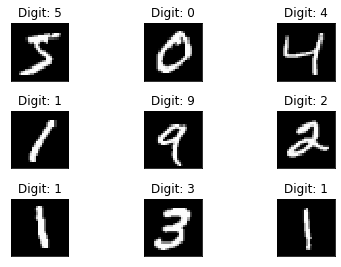

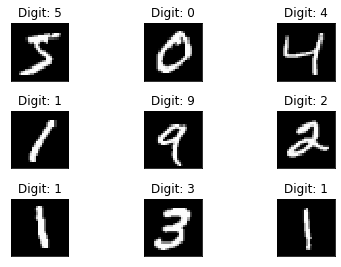

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

**Reshaping**

In [ ]:
#this assumes our data format
#For 3D data, "channels_last" assumes(conv_dim1, conv_dim2, conv_dim3, channels)
#while "channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
from keras import backend as k
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [ ]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

**Building and compiling of the model**

In [ ]:
from keras.models import Sequential
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#32 convolution filters used each of size 3x3 again
model.add(Conv2D(64, (3, 3), activation='relu'))

#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())

#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))

#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [ ]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent
#rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

**Training and evaluating the model**

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 98s 209ms/step - loss: 2.2741 - accuracy: 0.1491 - val_loss: 2.2136 - val_accuracy: 0.3010
Epoch 2/10
469/469 [==============================] - 96s 204ms/step - loss: 2.1800 - accuracy: 0.2815 - val_loss: 2.0974 - val_accuracy: 0.5248
Epoch 3/10
469/469 [==============================] - 94s 200ms/step - loss: 2.0644 - accuracy: 0.3952 - val_loss: 1.9504 - val_accuracy: 0.6508
Epoch 4/10
469/469 [==============================] - 94s 201ms/step - loss: 1.9172 - accuracy: 0.4856 - val_loss: 1.7684 - val_accuracy: 0.7181
Epoch 5/10
469/469 [==============================] - 94s 201ms/step - loss: 1.7501 - accuracy: 0.5459 - val_loss: 1.5631 - val_accuracy: 0.7614
Epoch 6/10
469/469 [==============================] - 95s 202ms/step - loss: 1.5715 - accuracy: 0.5970 - val_loss: 1.3511 - val_accuracy: 0.7871
Epoch 7/10
469/469 [==============================] - 94s 200ms/step - loss: 1.3996 - accuracy: 0.6342 - val_loss: 1.1575 - val_ac

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 


Test loss: 0.7830407619476318
Test accuracy: 0.8327999711036682
